In [110]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [111]:
data = pd.read_csv('train.csv')
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [112]:
data = pd.read_csv('train.csv')
data=data.drop(['dur'],axis=1)
print(data.shape)
data.head()

(45211, 10)


,age,job,marital,education_qual,call_type,day,mon,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,1,unknown,no


In [113]:
data.tail()

,age,job,marital,education_qual,call_type,day,mon,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,2,other,no


In [114]:
#Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   num_calls       45211 non-null  int64 
 8   prev_outcome    45211 non-null  object
 9   y               45211 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.4+ MB


In [115]:
data.describe()

,age,day,num_calls
count,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,2.763841
std,10.618762,8.322476,3.098021
min,18.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,39.000000,16.000000,2.000000
75%,48.000000,21.000000,3.000000
max,95.000000,31.000000,63.000000


In [116]:
# knowing the job categorical variables
data["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [117]:
# knowing the age categorical variables
data["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [118]:
data["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [119]:
data["education_qual"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-pack

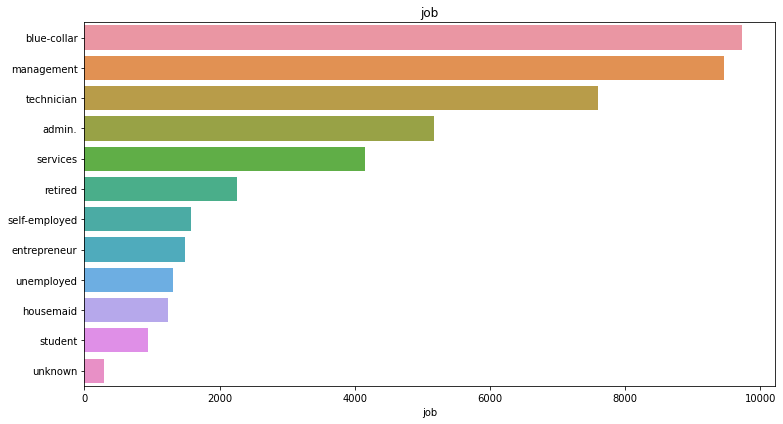

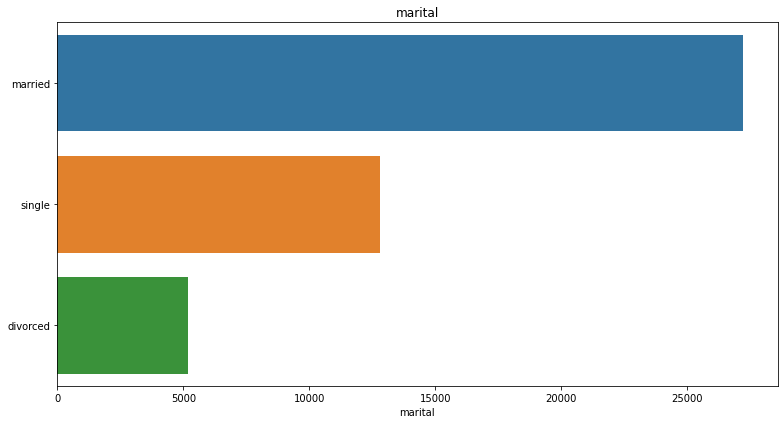

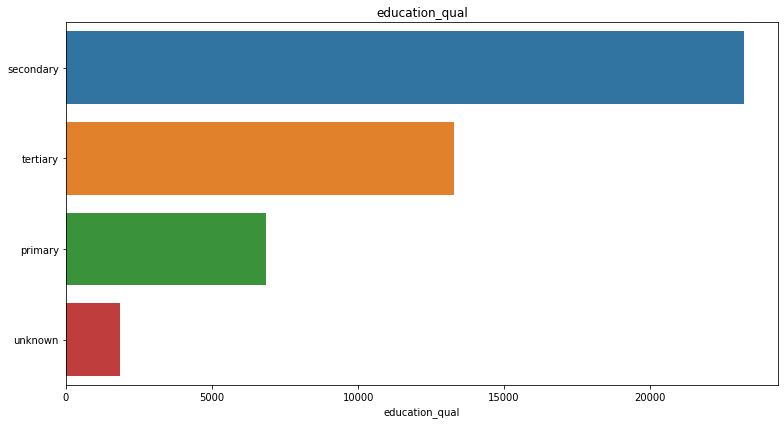

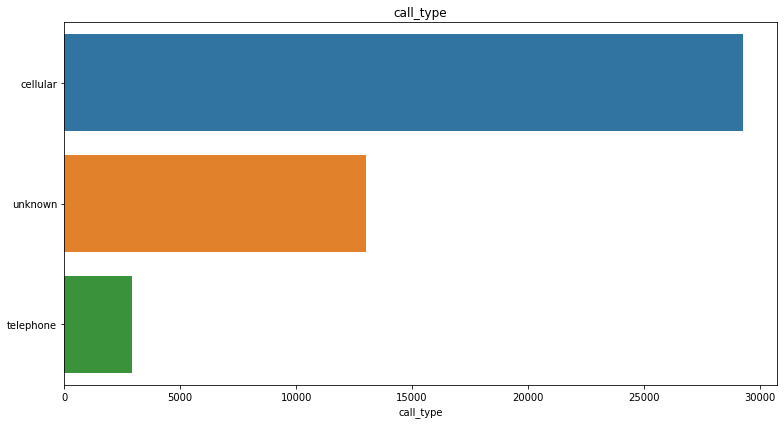

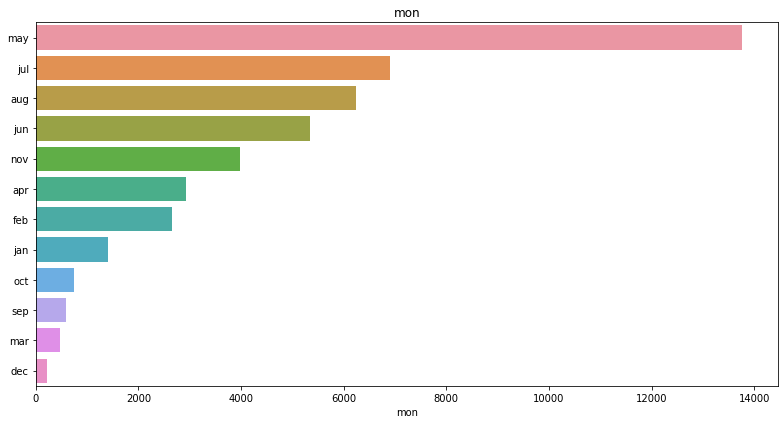

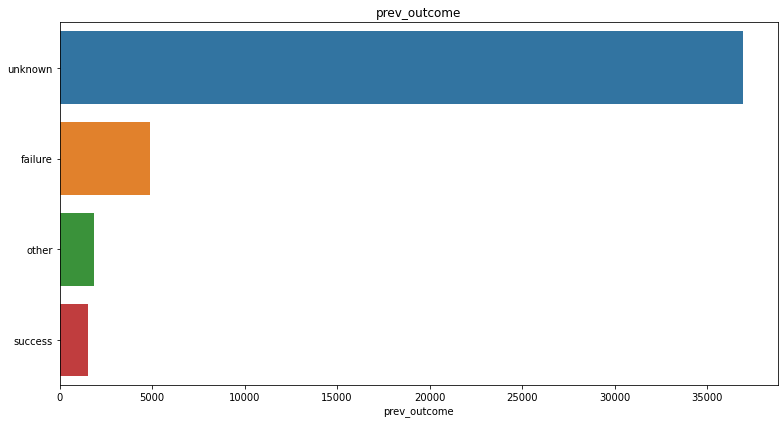

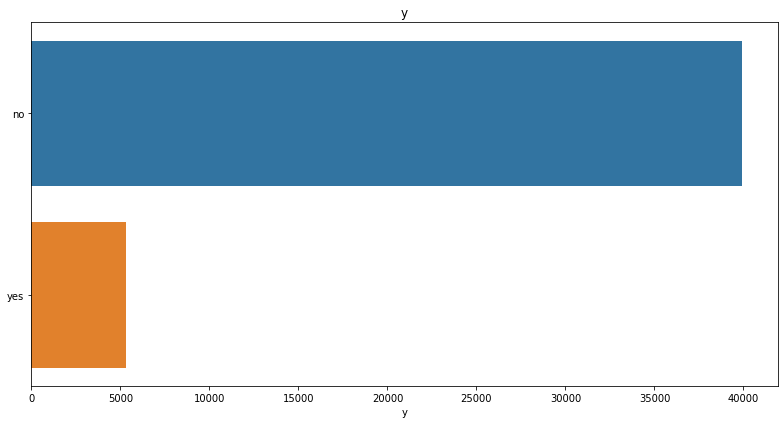

In [120]:
categori=['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome','y']
for col in categori:
    plt.figure(figsize=(11,6))
    sns.barplot(data[col].value_counts(),data[col].value_counts().index,data=data)
    plt.title(col)
    plt.tight_layout()

**Input Categorical feature Observation**

---


Job - More Job types are Admin ,mgmt, Technician and blue-collor and it means bank targeting high salaried people.

Marital - more people of type married 

Education_qual - more count in secondary and tertiary degree people . High salaried people would have more degree
expected. And illiterate count is very less.

mon- May is busy 

prev_outcome -outcome of the previous marketing campaign- Success is small rate.

**Categorize variables correlated with Target Variables**

In [121]:
#Check How Categorize variables correlated with Target Variables and How it impacted.
from scipy import stats

In [122]:
#Check How Job Type correlated with Target Variable
data.groupby(['job','y']).y.count()

#Admin are more interested in Term Deposit.

job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
Name: y, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


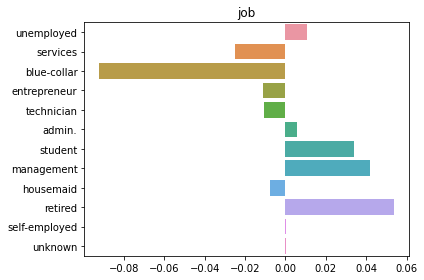

In [123]:
#Normalized distribution of each class per feature and plotted difference between positive and negative frequencies.
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the 
#product.
feature_name = 'job'
pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [124]:
data.groupby(['marital','y']).y.count()
#married people are more interested in Term Deposit

marital   y  
divorced  no      4585
          yes      622
married   no     24459
          yes     2755
single    no     10878
          yes     1912
Name: y, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


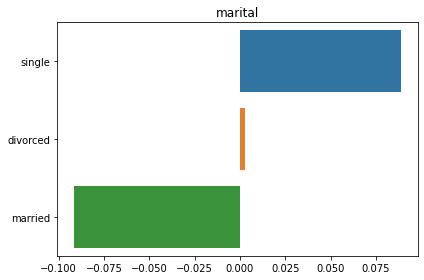

In [125]:
#Normalized distribution of each class per feature and plotted difference between positive and negative frequencies.
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the 
#product.
feature_name = 'marital'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [126]:
data.groupby(['education_qual','y']).y.count()

education_qual  y  
primary         no      6260
                yes      591
secondary       no     20752
                yes     2450
tertiary        no     11305
                yes     1996
unknown         no      1605
                yes      252
Name: y, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


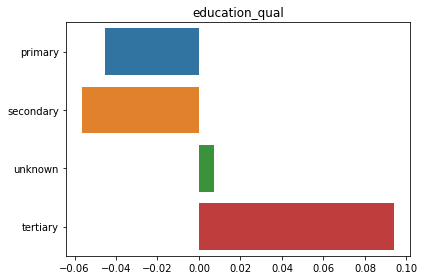

In [127]:
#Normalized distribution of each class per feature and plotted difference between positive and negative frequencies.
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the 
#product.
feature_name = 'education_qual'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [128]:
data.groupby(['call_type','y']).y.count()

call_type  y  
cellular   no     24916
           yes     4369
telephone  no      2516
           yes      390
unknown    no     12490
           yes      530
Name: y, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


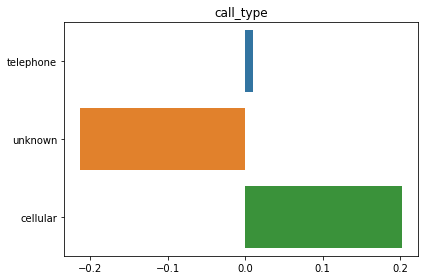

In [129]:
#Normalized distribution of each class per feature and plotted difference between positive and negative frequencies.
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the 
#product.
feature_name = 'call_type'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [130]:
data.groupby(['prev_outcome','y']).age.count()

prev_outcome  y  
failure       no      4283
              yes      618
other         no      1533
              yes      307
success       no       533
              yes      978
unknown       no     33573
              yes     3386
Name: age, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


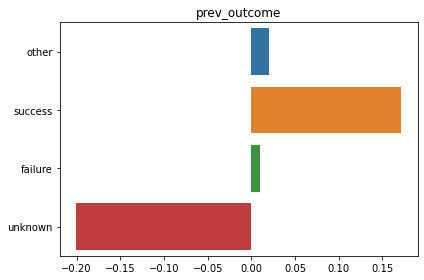

In [131]:
#Normalized distribution of each class per feature and plotted difference between positive and negative frequencies.
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the 
#product.
feature_name = 'prev_outcome'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [132]:
data.groupby(['mon','y']).age.count()

mon  y  
apr  no      2355
     yes      577
aug  no      5559
     yes      688
dec  no       114
     yes      100
feb  no      2208
     yes      441
jan  no      1261
     yes      142
jul  no      6268
     yes      627
jun  no      4795
     yes      546
mar  no       229
     yes      248
may  no     12841
     yes      925
nov  no      3567
     yes      403
oct  no       415
     yes      323
sep  no       310
     yes      269
Name: age, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


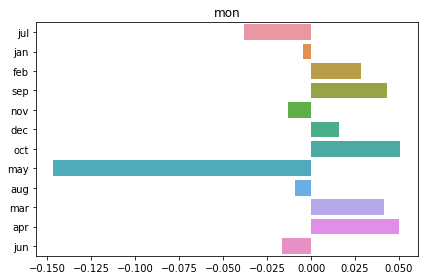

In [133]:
#Normalized distribution of each class per feature and plotted difference between positive and negative frequencies.
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the 
#product.
feature_name = 'mon'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


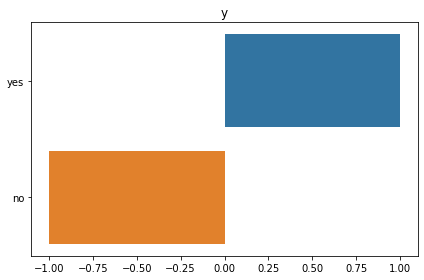

In [134]:
#Normalized distribution of each class per feature and plotted difference between positive and negative frequencies.
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the 
#product.
feature_name = 'y'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

**Inference/Result:** 
There are unknown values for many variables in the Data set. There are many ways to handle missing data. One of the ways is to discard the row but that would lead to reduction of data set and hence would not serve our purpose of building an accurate and realistic prediction model.

Other method is to smartly infer the value of the unknown variable from the other variables. This a way of doing an imputation where we use other independent variables to infer the value of the missing variable. This doesn't gurantee that all missing values will be addressed but majority of them will have a reasonable which can be useful in the prediction.

Variables with unknown/missing values are : 'education', 'job', 'call_type' .

Therefore, we start with creating new variables for the unknown values in 'education', 'job'. We do this to see if the values are missing at random or is there a pattern in the missing values.

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
# Saperating features and result vectors
y=data[['y']]
X = data.drop(['y'], axis=1)
#y = data['y'].values

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [138]:
X_test.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'num_calls', 'prev_outcome'],
      dtype='object')

In [139]:
X_train.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'num_calls', 'prev_outcome'],
      dtype='object')

In [140]:
y_train.head()

,y
10747,no
26054,no
9125,no
41659,no
4443,no


In [141]:
y_test.head()

,y
3776,no
9928,no
33409,no
31885,no
15738,no


# **Distribution of train and test data**

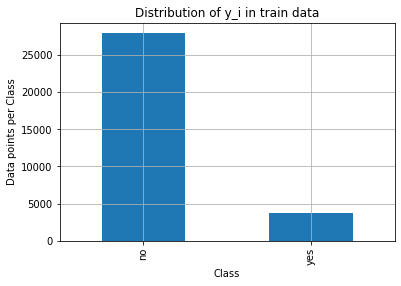

Number of data points in class 1 : 27956 ( 88.337 %)
Number of data points in class 2 : 3691 ( 11.663 %)
--------------------------------------------------------------------------------


In [142]:
def plot_distribution(class_distribution,title,xlabel,ylabel):
    class_distribution.plot(kind='bar')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()


# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train['y'].value_counts()
test_class_distribution = y_test['y'].value_counts()


plot_distribution(train_class_distribution,
                 'Distribution of y_i in train data',
                 'Class',
                 'Data points per Class')

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], 
          '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')
    
print('-'*80)

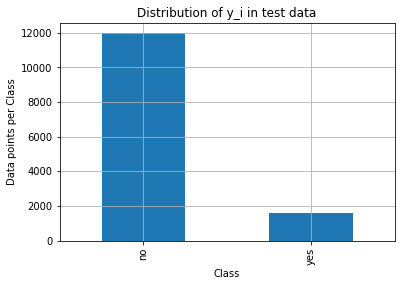

Number of data points in class 1 : 11966 ( 88.219 %)
Number of data points in class 2 : 1598 ( 11.781 %)
--------------------------------------------------------------------------------


In [143]:
plot_distribution(test_class_distribution,
                 'Distribution of y_i in test data',
                 'Class',
                 'Data points per Class')

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(test_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], 
          '(', np.round((test_class_distribution.values[i]/X_test.shape[0]*100), 3), '%)')

print('-'*80)

Distribution of both train ndnmADDDx22HDFVRVMVMFVDDFFDJNLKNLKNLKNLKNJBYHYGUYGYHGBJHYVJGCFRXDTRSETRDDHJJHJKHGJHVFHFRHJFJHFJDJSXJSHDCGHFCJCJKDXJDXJHDCHXJXKMJJHHUJUJUIIUIUIOOIOIJIJHJH

In [144]:
# concatinate train data for data manupulation
data = pd.concat([X_train, y_train], axis=1)

In [145]:
data.head()


,age,job,marital,education_qual,call_type,day,mon,num_calls,prev_outcome,y
10747,36,technician,single,tertiary,unknown,17,jun,4,unknown,no
26054,56,entrepreneur,married,secondary,cellular,19,nov,3,unknown,no
9125,46,blue-collar,married,secondary,unknown,5,jun,2,unknown,no
41659,41,management,divorced,tertiary,cellular,1,oct,1,success,no
4443,38,blue-collar,married,secondary,unknown,20,may,1,unknown,no


In [146]:
# concatinate test data for data manupulation
data_1= pd.concat([X_test, y_test], axis=1)

In [147]:
data_1.head()

,age,job,marital,education_qual,call_type,day,mon,num_calls,prev_outcome,y
3776,40,blue-collar,married,secondary,unknown,16,may,1,unknown,no
9928,47,services,single,secondary,unknown,9,jun,2,unknown,no
33409,25,student,single,tertiary,cellular,20,apr,1,unknown,no
31885,42,management,married,tertiary,cellular,9,apr,1,failure,no
15738,56,management,married,tertiary,cellular,21,jul,2,unknown,no


Now, to infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'. Our hypothesis here is that 'job' is influenced by the 'education' of a person. Hence, we can infer 'job' based on the education of the person. Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict the education.



In [148]:
def cross_tab(data,f1,f2):
    # find no of unique values in jobs colums
    jobs=list(data[f1].unique())
    # find no of unique values in education columns
    edu=list(data[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=data[data[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [149]:
cross_tab(data,'job','education_qual')

,tertiary,secondary,primary,unknown
job,,,,
admin.,381,2986,150,117
blue-collar,98,3818,2622,325
entrepreneur,453,395,132,58
housemaid,111,281,447,36
management,5419,791,195,168
retired,263,685,563,85
self-employed,590,415,90,29
services,146,2408,246,107
student,161,344,33,111


Inferring education from jobs : From the cross-tabulation, it can be seen that people with management jobs usually have a tertiary degree. Hence wherever 'job' = management and 'education_qual' = unknown, we can replace with 'tertiary degree'. Similarly, 'job' = 'services' then 'education' = 'secondary' and 'job' = 'technician' then 'education' = 'Secondary'.

While imputing the values for job and education, we were cognizant of the fact that the correlations should make real world sense. If it didn't make real world sense, we didn't replace the missing values.

In [150]:
data['job'][data['age']>60].value_counts()

retired          604
management        76
housemaid         40
technician        18
blue-collar       17
unknown           16
admin.            16
self-employed     15
unemployed         9
entrepreneur       8
services           2
Name: job, dtype: int64

Inferring jobs from age: As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.

In [151]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education_qual']=='unknown') & (data['job']=='management'), 'education_qual'] = 'tertiary'
data.loc[(data['education_qual']=='unknown') & (data['job']=='services'), 'education_qual'] = 'secondary'
data.loc[(data['education_qual']=='unknown') & (data['job']=='housemaid'), 'education_qual'] = 'primary'
data.loc[(data['job'] == 'unknown') & (data['education_qual']=='secondary'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education_qual']=='primary'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education_qual']=='tertiary'), 'job'] = 'management'

In [152]:
cross_tab(data,'job','education_qual')

,tertiary,secondary,primary,unknown
job,,,,
admin.,381.0,2986.0,150.0,117.0
blue-collar,98.0,3861.0,2664.0,325.0
entrepreneur,453.0,395.0,132.0,58.0
housemaid,111.0,281.0,483.0,0.0
management,5613.0,791.0,195.0,0.0
retired,267.0,689.0,564.0,92.0
self-employed,590.0,415.0,90.0,29.0
services,146.0,2515.0,246.0,0.0
student,161.0,344.0,33.0,111.0


In [153]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,num_calls,prev_outcome,y
10747,36,technician,single,tertiary,unknown,17,jun,4,unknown,no
26054,56,entrepreneur,married,secondary,cellular,19,nov,3,unknown,no
9125,46,blue-collar,married,secondary,unknown,5,jun,2,unknown,no
41659,41,management,divorced,tertiary,cellular,1,oct,1,success,no
4443,38,blue-collar,married,secondary,unknown,20,may,1,unknown,no


As we can see, we are able to reduce the number of unknowns and enhance our data set.

**Numerical variables**

In [154]:
numerical_variables = ['age','day', 'num_calls']
data[numerical_variables].describe()

,age,day,num_calls
count,31647.000000,31647.000000,31647.000000
mean,40.941669,15.829621,2.772237
std,10.632010,8.323200,3.154004
min,18.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,39.000000,16.000000,2.000000
75%,48.000000,21.000000,3.000000
max,95.000000,31.000000,63.000000


Balancing y out

<AxesSubplot:xlabel='y', ylabel='count'>

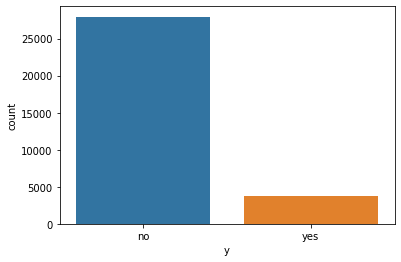

In [155]:
sns.countplot(x='y',data=data)

In [156]:
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

<AxesSubplot:xlabel='y', ylabel='count'>

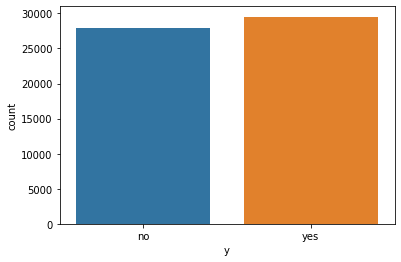

In [157]:
sns.countplot(x='y',data=data)

**outlier check**
Outliers
Outliers are defined as 1.5 x Q3 value (75th percentile). 

<AxesSubplot:>

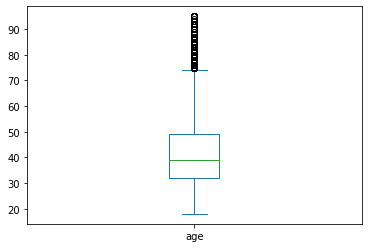

In [158]:
# Check outlier if any for Numberic column.
data.age.plot(kind='box')
# There are outlier and check max age and age greater than 90

In [159]:
print(data.age.max())
data[data['age'] > 80].head(5)

95


,age,job,marital,education_qual,call_type,day,mon,num_calls,prev_outcome,y
41982,81,retired,married,primary,cellular,27,oct,1,unknown,yes
42266,81,retired,married,primary,telephone,13,nov,1,other,yes
45010,86,retired,married,primary,cellular,14,oct,2,success,no
41387,82,retired,married,primary,cellular,1,sep,1,unknown,no
44893,81,retired,divorced,primary,cellular,27,sep,2,other,yes


<AxesSubplot:ylabel='Frequency'>

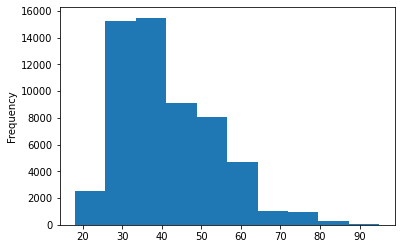

In [160]:
data.age.plot(kind='hist')

<AxesSubplot:ylabel='Density'>

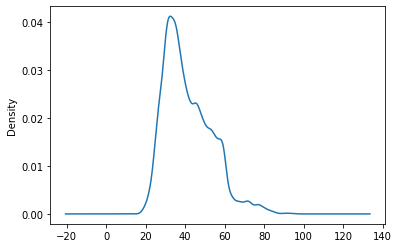

In [161]:
data.age.plot(kind='kde')

In [162]:
# Create Binning for all numeric fields base on Box plot quantile
def binning(dataframe,featureName):
    print (featureName)
    q1 = dataframe[featureName].quantile(0.25)
    q2 = dataframe[featureName].quantile(0.50)
    q3 = dataframe[featureName].quantile(0.75)
    dataframe.loc[(dataframe[featureName] <= q1), featureName] = 1
    dataframe.loc[(dataframe[featureName] > q1) & (dataframe[featureName] <= q2), featureName] = 2
    dataframe.loc[(dataframe[featureName] > q2) & (dataframe[featureName] <= q3), featureName] = 3
    dataframe.loc[(dataframe[featureName] > q3), featureName] = 4 
    print (q1, q2, q3)

In [163]:
binning(data,'age')

age
32.0 39.0 49.0


In [164]:
data.head(5)

,age,job,marital,education_qual,call_type,day,mon,num_calls,prev_outcome,y
10747,2,technician,single,tertiary,unknown,17,jun,4,unknown,no
26054,4,entrepreneur,married,secondary,cellular,19,nov,3,unknown,no
9125,3,blue-collar,married,secondary,unknown,5,jun,2,unknown,no
41659,3,management,divorced,tertiary,cellular,1,oct,1,success,no
4443,2,blue-collar,married,secondary,unknown,20,may,1,unknown,no


**Standardizing the data**

In [165]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [166]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,num_calls,prev_outcome,y
10747,2,technician,single,tertiary,unknown,17,jun,4,unknown,no
26054,4,entrepreneur,married,secondary,cellular,19,nov,3,unknown,no
9125,3,blue-collar,married,secondary,unknown,5,jun,2,unknown,no
41659,3,management,divorced,tertiary,cellular,1,oct,1,success,no
4443,2,blue-collar,married,secondary,unknown,20,may,1,unknown,no


In [167]:
idx_numeric=[0,5,7]
scaler = MinMaxScaler()
data[data.columns[idx_numeric]] = scaler.fit_transform(data[data.columns[idx_numeric]])

Categorical variables can be either Ordinal or Nominal

In [168]:
data['prev_outcome'] = data['prev_outcome'].map({'failure': -1,'unknown': 0,'success': 1})

Handling Nominal Variables(One Hot Encoding)
'job', 'marital', 'education_qual', 'call_type', 'mon', are Nominal Variables

In [169]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education_qual','call_type','mon']
data_clean = pd.get_dummies(data,columns=nominal)
data_clean['y']=data_clean['y'].map({'yes': 1,'no': 0})
data_clean.head()

,age,day,num_calls,prev_outcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
10747,0.333333,0.533333,0.048387,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26054,1.000000,0.600000,0.032258,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9125,0.666667,0.133333,0.016129,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
41659,0.666667,0.000000,0.000000,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4443,0.333333,0.633333,0.000000,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [170]:
data_clean.columns

Index(['age', 'day', 'num_calls', 'prev_outcome', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_qual_primary', 'education_qual_secondary',
       'education_qual_tertiary', 'education_qual_unknown',
       'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep'],
      dtype='object')

In [171]:
data_clean.shape

(57484, 39)

In [172]:
df_with_dummies=pd.get_dummies(data_clean)

In [173]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [174]:
features_dropped = ['marital_single','call_type_cellular',
                    'education_qual_unknown','job_unknown',]
data_clean = dropfeature(df_with_dummies, features_dropped)

**Aanalising the data distribution by plotting graphs for numerical fields**

In [175]:
 data_clean.describe()

,age,day,num_calls,prev_outcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
count,57484.000000,57484.000000,57484.000000,54597.000000,57484.000000,57484.000000,57484.000000,57484.000000,57484.000000,57484.000000,...,57484.000000,57484.000000,57484.000000,57484.000000,57484.000000,57484.000000,57484.000000,57484.000000,57484.000000,57484.000000
mean,0.482169,0.485999,0.024013,-0.012034,0.513673,0.116798,0.184069,0.028651,0.025451,0.225002,...,0.011238,0.067636,0.029504,0.137847,0.110048,0.027086,0.244085,0.083641,0.037976,0.029556
std,0.375666,0.279845,0.043376,0.473704,0.499817,0.321182,0.387544,0.166826,0.157491,0.417587,...,0.105413,0.251123,0.169215,0.344742,0.312952,0.162335,0.429547,0.276851,0.191139,0.169361
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.466667,0.016129,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.666667,0.032258,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [176]:
data_clean.head()

,age,day,num_calls,prev_outcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
10747,0.333333,0.533333,0.048387,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26054,1.000000,0.600000,0.032258,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9125,0.666667,0.133333,0.016129,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
41659,0.666667,0.000000,0.000000,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4443,0.333333,0.633333,0.000000,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [177]:
data_clean.shape

(57484, 35)

In [178]:
data_clean.corr()

,age,day,num_calls,prev_outcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
age,1.000000,0.005288,0.007675,0.029079,-0.016568,-0.043872,-0.030609,0.035957,0.090344,-0.026250,...,0.018679,0.003380,-0.000572,0.000353,0.024287,0.013197,-0.105972,0.026439,0.040724,0.018446
day,0.005288,1.000000,0.134921,0.004395,-0.037434,-0.009283,-0.016039,-0.007753,0.016480,0.004613,...,-0.003650,-0.225011,0.199216,0.123083,-0.193162,-0.038549,-0.008561,0.064140,0.093828,-0.070907
num_calls,0.007675,0.134921,1.000000,-0.006371,-0.132661,-0.020362,0.020025,0.033381,0.019914,0.009487,...,-0.016678,-0.029741,-0.051877,0.126779,0.043813,-0.034872,-0.037450,-0.073048,-0.070872,-0.051125
prev_outcome,0.029079,0.004395,-0.006371,1.000000,0.176175,-0.006248,-0.042355,-0.024253,0.006826,0.016126,...,0.032471,-0.013765,-0.007339,0.027175,0.028614,0.022009,-0.078202,-0.028728,0.044056,0.082868
y,-0.016568,-0.037434,-0.132661,0.176175,1.000000,0.007715,-0.115243,-0.031299,-0.017571,0.049689,...,0.075337,0.045854,-0.012997,-0.053948,-0.040205,0.126974,-0.169783,-0.020837,0.139604,0.126445
job_admin.,-0.043872,-0.009283,-0.020362,-0.006248,0.007715,1.000000,-0.172723,-0.062456,-0.058767,-0.195943,...,-0.002287,-0.003475,0.013735,0.006834,-0.000149,-0.002621,0.033820,-0.001871,0.006243,0.004977
job_blue-collar,-0.030609,-0.016039,0.020025,-0.042355,-0.115243,-0.172723,1.000000,-0.081573,-0.076756,-0.255921,...,-0.037435,-0.043376,-0.031351,0.012427,0.023320,-0.057128,0.167240,-0.034699,-0.050921,-0.051084
job_entrepreneur,0.035957,-0.007753,0.033381,-0.024253,-0.031299,-0.062456,-0.081573,1.000000,-0.027754,-0.092540,...,-0.008417,0.001081,-0.005295,0.026911,0.011913,-0.023517,0.000969,0.049058,-0.018302,-0.002265
job_housemaid,0.090344,0.016480,0.019914,0.006826,-0.017571,-0.058767,-0.076756,-0.027754,1.000000,-0.087074,...,-0.005702,-0.014934,-0.004677,0.031506,0.040238,0.009100,-0.050942,-0.010919,0.010657,-0.015158
job_management,-0.026250,0.004613,0.009487,0.016126,0.049689,-0.195943,-0.255921,-0.092540,-0.087074,1.000000,...,0.009741,-0.003120,-0.022798,-0.028508,-0.008834,0.035844,-0.078363,0.029673,-0.000257,0.040518


In [179]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

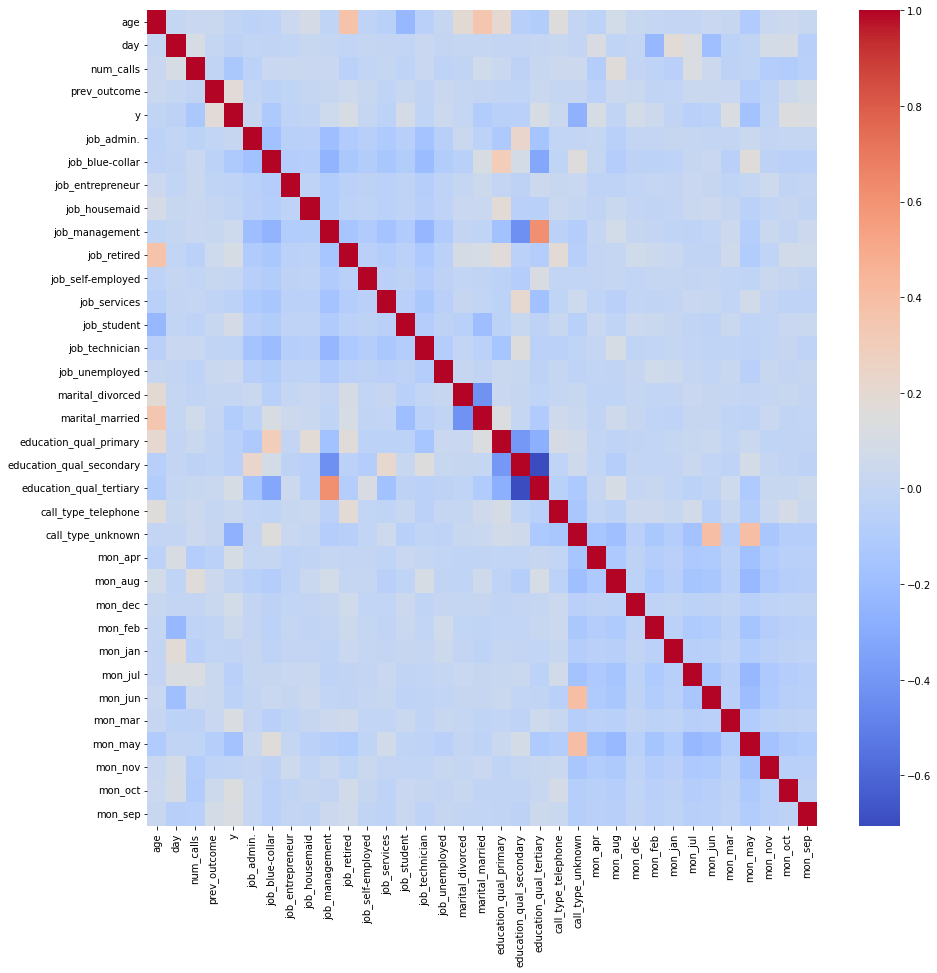

In [180]:
drawheatmap(data_clean)

Inferences: From the above heat map we can see that 'y' (our target variable) has good correlation with  'poutcome_success' , 'poutcome_unknown'. We expect to see these independent variables as significant while building the models.

**Standardizing the test data**

In [181]:
data_1= pd.concat([X_test, y_test], axis=1)

In [182]:
data_1.shape

(13564, 10)

In [183]:
data_1.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'num_calls', 'prev_outcome', 'y'],
      dtype='object')

<AxesSubplot:xlabel='y', ylabel='count'>

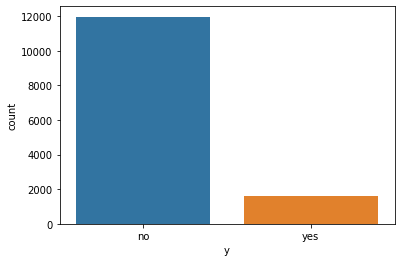

In [184]:
sns.countplot(x='y',data=data_1)

In [185]:
d1=data_1.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data_1=d1

<AxesSubplot:xlabel='y', ylabel='count'>

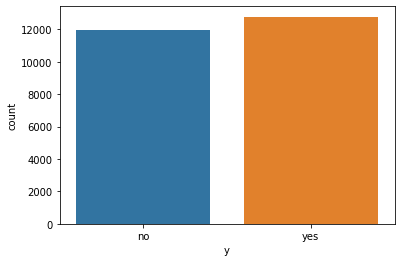

In [186]:
sns.countplot(x='y',data=data_1)

In [187]:
data_1.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [188]:
data_1.head()

,age,job,marital,education_qual,call_type,day,mon,num_calls,prev_outcome,y
3776,40,blue-collar,married,secondary,unknown,16,may,1,unknown,no
9928,47,services,single,secondary,unknown,9,jun,2,unknown,no
33409,25,student,single,tertiary,cellular,20,apr,1,unknown,no
31885,42,management,married,tertiary,cellular,9,apr,1,failure,no
15738,56,management,married,tertiary,cellular,21,jul,2,unknown,no


In [189]:
idx_numeric=[0,5,7]
scaler = MinMaxScaler()
data_1[data_1.columns[idx_numeric]] = scaler.fit_transform(data_1[data_1.columns[idx_numeric]])

In [190]:
data_1.head()

,age,job,marital,education_qual,call_type,day,mon,num_calls,prev_outcome,y
3776,0.293333,blue-collar,married,secondary,unknown,0.500000,may,0.000000,unknown,no
9928,0.386667,services,single,secondary,unknown,0.266667,jun,0.018519,unknown,no
33409,0.093333,student,single,tertiary,cellular,0.633333,apr,0.000000,unknown,no
31885,0.320000,management,married,tertiary,cellular,0.266667,apr,0.000000,failure,no
15738,0.506667,management,married,tertiary,cellular,0.666667,jul,0.018519,unknown,no


**Categorical variables can be either Ordinal or Nominal**

In [191]:
data_1['prev_outcome'] = data_1['prev_outcome'].map({'failure': -1,'unknown': 0,'success': 1})

In [192]:
data_1.head()

,age,job,marital,education_qual,call_type,day,mon,num_calls,prev_outcome,y
3776,0.293333,blue-collar,married,secondary,unknown,0.500000,may,0.000000,0.0,no
9928,0.386667,services,single,secondary,unknown,0.266667,jun,0.018519,0.0,no
33409,0.093333,student,single,tertiary,cellular,0.633333,apr,0.000000,0.0,no
31885,0.320000,management,married,tertiary,cellular,0.266667,apr,0.000000,-1.0,no
15738,0.506667,management,married,tertiary,cellular,0.666667,jul,0.018519,0.0,no


In [193]:
data_1.shape

(24750, 10)

Handling Nominal Variables(One Hot Encoding)
'job', 'marital', 'education_qual', 'call_type', 'mon' are Nominal Variables

In [194]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education_qual','call_type','mon']
data_clean_1 = pd.get_dummies(data_1,columns=nominal)
data_clean_1['y']=data_clean_1['y'].map({'yes': 1,'no': 0})
data_clean_1.head()

,age,day,num_calls,prev_outcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
3776,0.293333,0.500000,0.000000,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9928,0.386667,0.266667,0.018519,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33409,0.093333,0.633333,0.000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31885,0.320000,0.266667,0.000000,-1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15738,0.506667,0.666667,0.018519,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [195]:
data_clean_1.shape

(24750, 39)

In [196]:
df_with_dummies=pd.get_dummies(data_clean_1)

In [197]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [198]:
features_dropped = ['marital_single','call_type_cellular',
                    'education_qual_unknown','job_unknown','marital_single','call_type_cellular',
                    'education_qual_unknown','job_unknown']
data_clean_1 = dropfeature(df_with_dummies, features_dropped)

In [199]:
data_clean_1.shape

(24750, 35)

In [200]:
data_clean.shape

(57484, 35)

In [201]:

data_clean_1.columns

Index(['age', 'day', 'num_calls', 'prev_outcome', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'education_qual_primary', 'education_qual_secondary',
       'education_qual_tertiary', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep'],
      dtype='object')

In [202]:
data_clean.columns

Index(['age', 'day', 'num_calls', 'prev_outcome', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'education_qual_primary', 'education_qual_secondary',
       'education_qual_tertiary', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep'],
      dtype='object')

# **Model**

In [203]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [204]:
data_clean


,age,day,num_calls,prev_outcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
10747,0.333333,0.533333,0.048387,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26054,1.000000,0.600000,0.032258,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9125,0.666667,0.133333,0.016129,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
41659,0.666667,0.000000,0.000000,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4443,0.333333,0.633333,0.000000,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43021,1.000000,0.366667,0.032258,0.0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
43323,1.000000,0.566667,0.000000,1.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
41606,0.000000,0.566667,0.016129,-1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
16023,0.333333,0.700000,0.016129,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [205]:
import pandas as pd
import numpy as np
data_clean = data_clean.replace(np.nan,0)

In [206]:
# Saperating features and result vectors
y_test=data_clean_1[['y']]
X_test = data_clean_1.drop(['y'], axis=1)

#y = data['y'].values

In [207]:
# Saperating features and result vectors
y_train=data_clean[['y']]
X_train = data_clean.drop(['y'], axis=1)

#y = data['y'].values

In [208]:
def Convert_Model(X_train,y_train,X_test,y_test,classifier):
     from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
     classifier.fit(X_train,y_train) 
     print(classifier.score(X_test,y_test)) 
     print(confusion_matrix(y_test,classifier.predict(X_test)))
     print(accuracy_score(y_test,classifier.predict(X_test)))
     print(precision_score(y_test,classifier.predict(X_test)))
     print(recall_score(y_test,classifier.predict(X_test)))
     f1 = 2 * precision_score(y_test,classifier.predict(X_test)) * recall_score(y_test,classifier.predict(X_test)) / (precision_score(y_test,classifier.predict(X_test)) + recall_score(y_test,classifier.predict(X_test)))
     print("f1 score", f1)
     return classifier

In [209]:
X_train = X_train.replace(np.nan,0)
X_test = X_test.replace(np.nan,0)

In [210]:
X_train

,age,day,num_calls,prev_outcome,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
10747,0.333333,0.533333,0.048387,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26054,1.000000,0.600000,0.032258,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9125,0.666667,0.133333,0.016129,0.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
41659,0.666667,0.000000,0.000000,1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4443,0.333333,0.633333,0.000000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43021,1.000000,0.366667,0.032258,0.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
43323,1.000000,0.566667,0.000000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
41606,0.000000,0.566667,0.016129,-1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
16023,0.333333,0.700000,0.016129,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [211]:
X_test

,age,day,num_calls,prev_outcome,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
3776,0.293333,0.500000,0.000000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9928,0.386667,0.266667,0.018519,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33409,0.093333,0.633333,0.000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31885,0.320000,0.266667,0.000000,-1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15738,0.506667,0.666667,0.018519,0.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23775,0.280000,0.900000,0.000000,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
43067,0.640000,0.566667,0.000000,1.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4916,0.253333,0.666667,0.000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31482,0.600000,0.000000,0.018519,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
# import Dummy Classifier for creating Base Model
from sklearn.dummy import DummyClassifier
classifier = DummyClassifier(strategy='most_frequent',random_state=0)
finalModel = Convert_Model(X_train,y_train,X_test,y_test,classifier)

0.5165252525252525
[[    0 11966]
 [    0 12784]]
0.5165252525252525
0.5165252525252525
1.0
f1 score 0.681195715884265


# **Logistical Regression**

In [213]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [214]:
# import Dummy Classifier for creating Base Model
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
finalModel_lr = Convert_Model(X_train,y_train,X_test,y_test,classifier_lr)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6735757575757576
[[8311 3655]
 [4424 8360]]
0.6735757575757576
0.6957969205160216
0.6539424280350438
f1 score 0.6742207347070447


AUC: 0.745


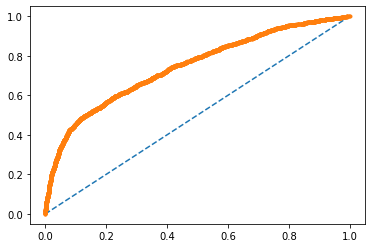

In [215]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# **Training Random Forest Classifier**

In [217]:
from sklearn.ensemble import GradientBoostingClassifier
rfc = RandomForestClassifier(n_estimators=100)
finalModel_rfc = Convert_Model(X_train,y_train,X_test,y_test,rfc)

<ipython-input-208-568d4f1df485>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train,y_train)


0.6173737373737374
[[10808  1158]
 [ 8312  4472]]
0.6173737373737374
0.794316163410302
0.3498122653316646
f1 score 0.48571738894319544


# **Testing**

AUC: 0.728


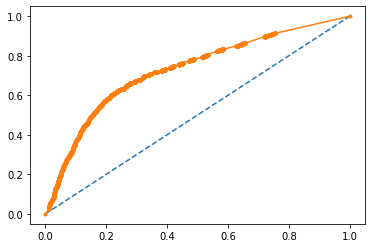

In [218]:
probs = finalModel_rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# **Feature Importance**

In [219]:
data_clean.head()

,age,day,num_calls,prev_outcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
10747,0.333333,0.533333,0.048387,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26054,1.000000,0.600000,0.032258,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9125,0.666667,0.133333,0.016129,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
41659,0.666667,0.000000,0.000000,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4443,0.333333,0.633333,0.000000,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [220]:
X = data_clean.drop('y', axis=1).values
y = data_clean['y'].values
pp=data_clean.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
feature_importances = pd.DataFrame(rfc.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

<ipython-input-220-4a2d78d1c25d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [221]:
feature_importances

,importance
day,0.297596
num_calls,0.131465
prev_outcome,0.090839
age,0.085053
call_type_unknown,0.053007
marital_married,0.023484
mon_may,0.018714
marital_divorced,0.016454
call_type_telephone,0.016313
education_qual_secondary,0.015643


# **SVM Classifier**

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# **Choosing the best parameters for SVM classifier based on 2-fold Cross Validation score**

In [223]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1], 'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

In [224]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=2, scoring='precision')

In [225]:
finalModel_gb = Convert_Model(X_train,y_train,X_test,y_test,clf)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.7471088806458651
[[9648 2318]
 [5936 6848]]
0.6665050505050505
0.7471088806458651
0.5356695869837297
f1 score 0.6239635535307517


In [226]:
print('The best model is: ', finalModel_gb.best_params_)
print('This model produces a mean cross-validated score (precision) of', finalModel_gb.best_score_)

The best model is:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (precision) of 0.7957589240699039


# **Testing**

In [227]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
y_true, y_pred = y_test, finalModel_gb.predict(X_test)
pre1 = precision_score(y_true, y_pred)
rec1 = recall_score(y_true, y_pred)
acc1 = accuracy_score(y_true, y_pred)
f1_1 = f1_score(y_true, y_pred)
print('precision on the evaluation set: ', pre1)
print('recall on the evaluation set: ', rec1)
print('accuracy on the evaluation set: ', acc1)
print("F1 on the evaluation set",f1_1)

precision on the evaluation set:  0.7471088806458651
recall on the evaluation set:  0.5356695869837297
accuracy on the evaluation set:  0.6665050505050505
F1 on the evaluation set 0.6239635535307517


AUC: 0.671


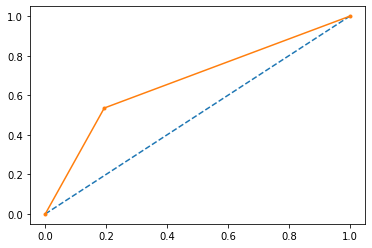

In [228]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_gb.predict(X_test)
# keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


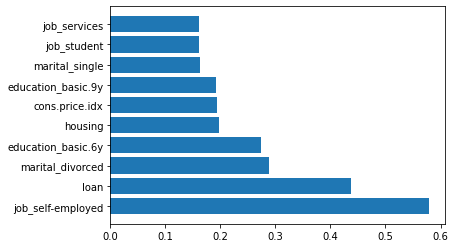

In [229]:
from matplotlib import pyplot as plt
from sklearn import svm
from matplotlib import pyplot as plt
X = data_clean.drop('y', axis=1).values
y = data_clean['y'].values
pp=data_clean.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)



def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called
features_names = ['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'] 
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)

# Specify your top n features you want to visualize.
# You can also discard teh abs() function 
# if you are interested in negative contribution of features
f_importances(abs(svm.coef_[0]), features_names, top=10)

# **Classify the model using XGBClassifier**

In [230]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [231]:
# fit model no training data
model = XGBClassifier()
finalModel_XGB = Convert_Model(X_train,y_train,X_test,y_test,model)

0.7007272727272728
[[9999 1967]
 [5440 7344]]
0.7007272727272728
0.7887444957577059
0.574468085106383
f1 score 0.664765784114053


AUC: 0.757


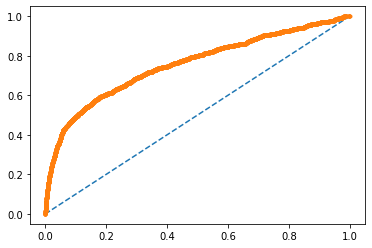

In [232]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = finalModel_XGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [233]:
X = data_clean.drop('y', axis=1).values
y = data_clean['y'].values
pp=data_clean.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rmodel = XGBClassifier()
rmodel.fit(X_train, y_train)
feature_importances = pd.DataFrame(rmodel.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

In [234]:
feature_importances

,importance
call_type_unknown,0.134471
prev_outcome,0.105088
mon_oct,0.094608
mon_mar,0.070694
mon_jun,0.050018
mon_sep,0.048248
mon_dec,0.039026
mon_feb,0.036298
mon_nov,0.033141
mon_apr,0.032443



# **MLP Classifier with 3 layer**

In [235]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
seed = 7
test_size = 0.33
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [236]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = mlp.predict(X_test)
#print the confusion matrix
print(confusion_matrix(y_test,predictions))

[[9245 2721]
 [4752 8032]]


In [237]:
#Print the classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71     11966
           1       0.75      0.63      0.68     12784

    accuracy                           0.70     24750
   macro avg       0.70      0.70      0.70     24750
weighted avg       0.71      0.70      0.70     24750



In [238]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


classifier_mlp = MLPClassifier(hidden_layer_sizes=(13,14,15 ) ,max_iter=500)
finalModel_mlp = Convert_Model(X_train,y_train,X_test,y_test,classifier_mlp)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6848484848484848
[[9310 2656]
 [5144 7640]]
0.6848484848484848
0.7420357420357421
0.5976220275344181
f1 score 0.6620450606585789


AUC: 0.736


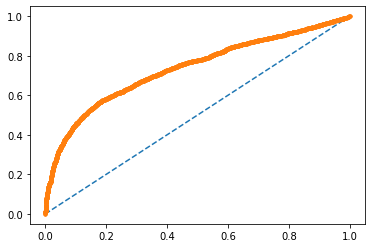

In [239]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# **MLP Classifier with 2 layer**

In [240]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


classifier_mlp = MLPClassifier(hidden_layer_sizes=(13,13 ) ,max_iter=500)
finalModel_mlp = Convert_Model(X_train,y_train,X_test,y_test,classifier_mlp)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7058181818181818
[[9325 2641]
 [4640 8144]]
0.7058181818181818
0.7551228558182661
0.6370463078848561
f1 score 0.6910772625058339


AUC: 0.772


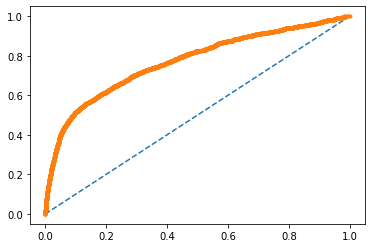

In [241]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# **MLP Classifier with 1 layer**

In [242]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


classifier_mlp = MLPClassifier(hidden_layer_sizes=(13 ) ,max_iter=500)
finalModel_mlp = Convert_Model(X_train,y_train,X_test,y_test,classifier_mlp)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7000808080808081
[[9423 2543]
 [4880 7904]]
0.7000808080808081
0.7565808366038097
0.6182728410513142
f1 score 0.68047006155568


AUC: 0.762


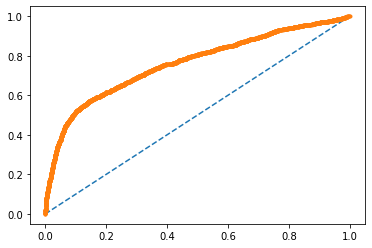

In [243]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [244]:
#by balcing y output
# After standardization our f1 score and auc percentage increases
from prettytable import PrettyTable    
x = PrettyTable()
 
x.field_names = ["MODEL", "ACCURACY_score","precision_score","Recall_score","F1 score","AUC"]
x.add_row(["Dummy classifer",0.50, 0.50,1,0.66,"NAN"])
x.add_row(["Logistic Regression)", 0.73, 0.80,0.62,0.70,0.78])
x.add_row(["Random Forest",0.65, 0.85,0.38,0.52,0.766])
x.add_row(["SVM classifier",0.73, 0.82,0.60,0.69,0.73])
x.add_row(["XGB boost",0.74, 0.81,0.63,0.71,0.798])
x.add_row(["MLP  classifier with 3 layers",0.70, 0.74,0.61,0.67,0.745])
x.add_row(["MLP classifier with 2 layers",0.70, 0.75,0.61,0.68,0.76])
x.add_row(["MLP classifier 1 layers",0.72, 0.78,0.62,0.693,0.766])

print('Bank Marketing')
print(x)

Bank Marketing
+-------------------------------+----------------+-----------------+--------------+----------+-------+
|             MODEL             | ACCURACY_score | precision_score | Recall_score | F1 score |  AUC  |
+-------------------------------+----------------+-----------------+--------------+----------+-------+
|        Dummy classifer        |      0.5       |       0.5       |      1       |   0.66   |  NAN  |
|      Logistic Regression)     |      0.73      |       0.8       |     0.62     |   0.7    |  0.78 |
|         Random Forest         |      0.65      |       0.85      |     0.38     |   0.52   | 0.766 |
|         SVM classifier        |      0.73      |       0.82      |     0.6      |   0.69   |  0.73 |
|           XGB boost           |      0.74      |       0.81      |     0.63     |   0.71   | 0.798 |
| MLP  classifier with 3 layers |      0.7       |       0.74      |     0.61     |   0.67   | 0.745 |
|  MLP classifier with 2 layers |      0.7       |       0